<a href="https://colab.research.google.com/github/AlexeyUdod/mds/blob/master/mds_fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from scipy.spatial.distance import cosine as dcos
from sympy import *
x = Symbol('x')
%matplotlib inline

### Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [0]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

<b> a) </b> Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

<b> b) </b>Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [16]:
rlen = raitings.shape[0]
results = []
for i in range(rlen):
  results.append([i,0,1])
  for i2 in range(rlen):
    if i == i2:
      continue
    dcos_i2 = dcos(raitings[i], raitings[i2])
    if dcos_i2 < results[i][2]:
      results[i][1] = i2
      results[i][2] = dcos_i2
rdata = pd.DataFrame(results, columns = ['for user ', 'nearest user', 'with distance'])
rdata

,for user,nearest user,with distance
0,0,8,0.089340
1,1,4,0.128619
2,2,9,0.081269
3,3,9,0.141131
4,4,8,0.120515
5,5,9,0.144851
6,6,3,0.167258
7,7,5,0.155483
8,8,0,0.089340
9,9,2,0.081269


Сжать признаковые описания пользователя можно с помощью SVD

### Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

In [17]:
f = (tan(sin(x)+cos(2*x+3)))**2
diff(f).subs(x,1)

2*(1 + tan(cos(5) + sin(1))**2)*(cos(1) - 2*sin(5))*tan(cos(5) + sin(1))

### Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку <b>error</b>

In [0]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [0]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [0]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

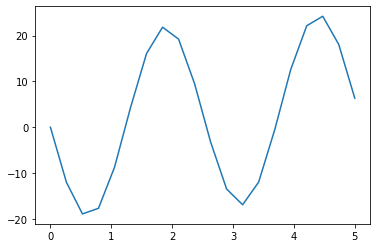

In [21]:
plt.plot(x, fx)
plt.show()

In [0]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

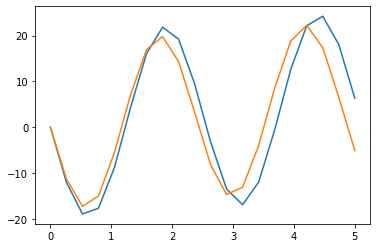

a=2.89473684
b=-2.63157895


In [189]:
o = 0.1
bounds = [(y-o, y+o) for y in x]
res = minimize(error, x,  method='trust-constr', bounds=bounds)
a = res['x'][0]
b = res['x'][1]
plt.plot(x, fx)
plt.plot(x, f(x, a, b))
plt.show()
print(f'a={a}\nb={b}')

### Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

[5.04 5.04 4.76 4.7  4.36 4.84 5.06 4.46 4.78 4.32 5.08 4.98 4.94 4.02
 5.14 4.56 4.18 4.44 5.12 4.68 4.7  4.7  5.12 4.54 4.26 3.68 4.48 5.68
 3.84 4.66 4.72 4.8  4.2  4.92 5.58 4.68 4.2  4.34 4.06 4.72 4.64 4.62
 4.34 4.84 4.8  5.   4.76 4.36 4.66 4.94 4.82 4.48 4.54 4.26 4.56 4.68
 4.72 4.74 4.96 5.28 5.4  4.48 4.58 4.52 5.58 4.28 4.18 4.16 4.76 4.9
 5.68 4.62 5.06 4.58 4.98 4.26 4.5  3.92 5.02 4.3  4.84 4.28 4.36 4.06
 4.38 4.72 4.84 4.32 5.2  5.2  5.38 4.68 4.34 4.74 4.68 3.84 4.4  4.9
 4.82 4.6  3.86 4.62 5.1  5.18 3.94 3.72 4.64 4.62 4.2  4.14 5.04 5.28
 5.04 4.44 4.46 5.04 4.9  4.68 4.18 4.3  4.56 4.56 5.2  5.2  4.86 4.22
 4.5  5.14 4.42 5.16 4.86 4.16 5.1  5.44 4.8  4.26 4.64 5.04 4.32 4.3
 4.64 5.34 5.16 4.26 4.22 4.38 5.44 4.14 4.9  4.56 4.5  5.6  4.88 5.02
 4.54 4.54 4.5  4.58 4.56 4.54 5.02 4.32 5.14 5.   4.36 4.62 5.36 4.4
 4.6  4.72 4.46 5.14 4.64 4.38 4.86 5.16 4.9  4.86 4.94 5.08 4.54 4.42
 4.34 4.44 4.34 4.24 4.24 4.46 4.36 4.76 4.2  4.46 4.1  4.62 4.36 5.2
 4.14 4.54 

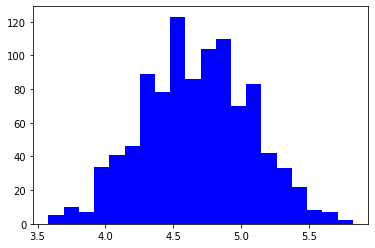

In [11]:
elements = np.random.randint(0, 10, 20)
probabilities = np.random.random(20)
means = np.array([])
for i in range(1000):
  r = np.mean(np.random.choice(elements, 50, p=probabilities / sum(probabilities)))
  means = np.append(means,r)
print(means)
plt.hist(means, 20, color='Blue')
plt.show()

### Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

 [1, 1]]

In [12]:
a = np.array([[1, 4],
              [1, 1]])

k, M = np.linalg.eig(a)
print(f'собственные значения\n {k},\n\nсобственные вектора \n{M}')

собственные значения
 [ 3. -1.],

собственные вектора 
[[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]


Tr=1+1=2

det=1*1-4*1=-3

h**2-2*h-3=(h-1)*(h+3)

собственные значения (3,-1)

А+1Е=[[2,4],
      [1,2]]

A-3E=[[-2,4],
      [1,-2]]
      
собственные вектора
[[2,-2],
 [1,1]]